In [1]:
!pip install -q langchain_groq

In [2]:
from typing import TypedDict, List, Union
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage
from langchain_groq import ChatGroq

In [3]:
GROQ_API_KEY = 'gsk_xxxxxxxxxxxxxxxxxxxxx'

In [4]:
class AgentState(TypedDict):
  messages : List[Union[HumanMessage, AIMessage]]

llm = ChatGroq(
    model="llama-3.1-8b-instant", temperature=0,
    api_key=GROQ_API_KEY
)

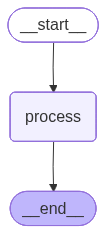

In [5]:
def process(state: AgentState) -> AgentState:
  """This is the processing node of the Graph"""
  response = llm.invoke(state['messages'])
  state['messages'].append(AIMessage(content=response.content))
  print(f"\nAI: {response.content}")
  print('Current State:', state)
  return state

graph = StateGraph(AgentState)
graph.add_node('process', process)

graph.add_edge(START, 'process')
graph.add_edge('process', END)

agent = graph.compile()

from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [6]:
conversation_history = []
# We are sending the conversation history while invoking agent which changes the state =['messages'] always that way the past convo is preserved.
user_input = input('Human: ')
while user_input != 'exit':
  print('Before: ', conversation_history)
  conversation_history.append(HumanMessage(content=user_input))
  result = agent.invoke({'messages' : conversation_history})
  print(result)
  conversation_history = result['messages'] # If we dont write this line prev AI Message wont be there in convo history
  print('After: ', conversation_history)
  user_input = input('Human: ')


with open('logging.txt', 'w') as file:
  file.write('Your Conversation Log: \n')

  for message in conversation_history:
    if isinstance(message, HumanMessage):
      file.write(f"You: {message.content}\n")
    elif isinstance(message, AIMessage):
      file.write(f"AI: {message.content}\n\n")

  file.write('End of Conversation')

print('Conversation saved to logging.txt')

Human: Hi I am Harsha
Before:  []

AI: Nice to meet you, Harsha. Is there something I can help you with or would you like to chat?
Current State: {'messages': [HumanMessage(content='Hi I am Harsha', additional_kwargs={}, response_metadata={}), AIMessage(content='Nice to meet you, Harsha. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={})]}
{'messages': [HumanMessage(content='Hi I am Harsha', additional_kwargs={}, response_metadata={}), AIMessage(content='Nice to meet you, Harsha. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={})]}
After:  [HumanMessage(content='Hi I am Harsha', additional_kwargs={}, response_metadata={}), AIMessage(content='Nice to meet you, Harsha. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={})]
Human: How ar you?
Before:  [HumanMessage(content='Hi I am Harsha', additional_kwargs={},